In [23]:
# Importing the required packages for twitter data collection !
import tweepy
from tweepy import OAuthHandler
import json
import re
from nltk.tokenize import word_tokenize
import operator
from collections import Counter
from nltk import bigrams
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

%matplotlib inline

In [2]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""

regex_str = [
    emoticons_str,
    r'<[^>]+>',  # HTML tags
    r'(?:@[\w_]+)',  # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)",  # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',  # URLs

    r'(?:(?:\d+,?)+(?:\.?\d+)?)',  # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])",  # words with - and '
    r'(?:[\w_]+)',  # other words
    r'(?:\S)'  # anything else
]

tokens_re = re.compile(r'(' + '|'.join(regex_str) + ')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^' + emoticons_str + '$', re.VERBOSE | re.IGNORECASE)


def tokenize(s):
    return tokens_re.findall(s)


def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens


In [3]:
# This is for getting rid of from stop words in tweets. 
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['RT', 'via', '…']


In [4]:
# Most used hashtags in tweets! Top 10 will be shown but we can increase it by changing the count_all.most_common
fname = 'tweet_4.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text'].lower()) if term not in stop]
        
        # Count terms only once, equivalent to Document Frequency
        terms_single = set(terms_stop)
        
        # Count hashtags only
        terms_hash = [term for term in preprocess(tweet['text']) 
              if term.startswith('#')]
        
        # Count terms only (no hashtags, no mentions)
        terms_only = [term for term in preprocess(tweet['text']) 
              if term not in stop and
              not term.startswith(('#', '@'))] 
        
        # Update the counter
        count_all.update(terms_hash)
    # Print the first 5 most frequent words
    print(count_all.most_common(40))

[('#Jesus', 15459), ('#Bible', 9032), ('#jesus', 3545), ('#God', 3515), ('#bible', 2609), ('#truth', 1958), ('#Christ', 1297), ('#Christian', 1126), ('#', 990), ('#JESUS', 938), ('#Christmas', 930), ('#faith', 842), ('#love', 641), ('#quote', 560), ('#pray', 532), ('#hope', 436), ('#Islam', 423), ('#Christianity', 408), ('#Love', 403), ('#Faith', 396), ('#church', 384), ('#Church', 366), ('#MerryChristmas', 359), ('#christmas', 327), ('#Lord', 321), ('#catholic', 304), ('#BibleStudy', 300), ('#prayer', 298), ('#christianity', 293), ('#cross', 290), ('#charlesmilander', 290), ('#RoyMoore', 280), ('#OneNationUnderGOD', 280), ('#TRUDEAU', 277), ('#Vatican', 263), ('#Prayer', 262), ('#Protestant', 261), ('#Puritan', 259), ('#Calvinist', 259), ('#scripture', 257)]


In [5]:
# Most used words in tweets 

with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        
        # Count terms only once, equivalent to Document Frequency
        terms_single = set(terms_stop)
        
        # Count terms only (no hashtags, no mentions)
        terms_only = [term for term in preprocess(tweet['text']) 
              if term not in stop and
              not term.startswith(('#', '@'))] 
        
        # Update the counter
        count_all.update(terms_only)
    # Print the first 5 most frequent words
    print(count_all.most_common(20))

[('I', 5251), ('God', 4076), ('The', 3936), ('Jesus', 2785), ('1', 2699), ('Proverbs', 2395), ('us', 2329), ('Lord', 2111), ('’', 2043), ('And', 2013), ('2', 1915), ('Psalms', 1898), ('amp', 1812), ('shall', 1629), ('He', 1625), ('️', 1614), ('love', 1529), ('You', 1514), ('life', 1497), ('“', 1471)]


In [6]:
'''from collections import defaultdict
# remember to include the other import from the previous post
 
com = defaultdict(lambda : defaultdict(int))
 
# f is the file pointer to the JSON data set
with open(fname, 'r') as f:
    for line in f: 
        tweet = json.loads(line)
        terms_only = [term for term in preprocess(tweet['text']) 
                      if term not in stop 
                      and not term.startswith(('#', '@'))]
 
    # Build co-occurrence matrix
    for i in range(len(terms_only)-1):            
        for j in range(i+1, len(terms_only)):
            w1, w2 = sorted([terms_only[i], terms_only[j]])                
            if w1 != w2:
                com[w1][w2] += 1'''

"from collections import defaultdict\n# remember to include the other import from the previous post\n \ncom = defaultdict(lambda : defaultdict(int))\n \n# f is the file pointer to the JSON data set\nwith open(fname, 'r') as f:\n    for line in f: \n        tweet = json.loads(line)\n        terms_only = [term for term in preprocess(tweet['text']) \n                      if term not in stop \n                      and not term.startswith(('#', '@'))]\n \n    # Build co-occurrence matrix\n    for i in range(len(terms_only)-1):            \n        for j in range(i+1, len(terms_only)):\n            w1, w2 = sorted([terms_only[i], terms_only[j]])                \n            if w1 != w2:\n                com[w1][w2] += 1"

In [7]:
# Opening the file and loading the lines 
tweet_files = ['tweet_4.json']
tweets = []
for file in tweet_files:
    with open(file, 'r') as f:
        for line in f.readlines():
            tweets.append(json.loads(line))

In [52]:
# Creating an dataframe from tweets and extracting relevant information from tweets variable! 
def populate_tweet_df(tweets):
    df = pd.DataFrame()
 
    df['text'] = list(map(lambda tweet: tweet['text'], tweets))
 
    df['location'] = list(map(lambda tweet: tweet['user']['location'], tweets))
 
    df['country_code'] = list(map(lambda tweet: tweet['place']['country_code']
                                  if tweet['place'] != None else '', tweets))
 
    df['long'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][0]
                        if tweet['coordinates'] != None else 'NaN', tweets))
 
    df['latt'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][1]
                        if tweet['coordinates'] != None else 'NaN', tweets))
    df['created_at'] = list(map(lambda tweet: tweet['created_at'], tweets))
    df['screen_name'] = list[map(lambda tweet: tweet['user']['screen_name']
                                 if tweet['user'] != None else 'NaN',tweets)]
 
    return df


In [53]:
df = populate_tweet_df(tweets)
df.head()

TypeError: 'type' object is not subscriptable

In [35]:
# Creating the second dataframe for Time Series Analysis 
def populate_tweet_df_2(tweets):
    df_2 = pd.DataFrame()
    
    df_2['created_at'] = list(map(lambda tweet: tweet['created_at'], tweets))
    df_2['ones'] = [1]*len(df_2)
    return df_2 
   

In [36]:
df_2 = populate_tweet_df_2(tweets)

df_2['created_at'] = pd.to_datetime(df_2['created_at'])
df_3 = df_2.set_index('created_at')



In [43]:
#ticks = df_3.loc[:, ['text']]
df_4 = df_3.resample('5min').sum()
print(df_4.head())
print(df_4.describe())

                     ones
created_at               
2017-12-29 05:50:00    36
2017-12-29 05:55:00    99
2017-12-29 06:00:00    64
2017-12-29 06:05:00    55
2017-12-29 06:10:00    64
             ones
count  739.000000
mean    55.548038
std     17.368907
min      2.000000
25%     44.000000
50%     53.000000
75%     66.000000
max    131.000000


In [13]:
ticks = df_3.loc[:, ['text']]
bars = ticks.text.resample('5min').sum()


In [14]:
bars['index1'] = bars.index
bars.head()

created_at
2017-12-29 05:50:00    RT @iHaveGoodNews4U: There are more than 168,0...
2017-12-29 05:55:00    RT @SevenShepherd: "So that a man shall say, V...
2017-12-29 06:00:00    When death is swallowed up, I will wipe away e...
2017-12-29 06:05:00    RT @charlesmilander: God will always bring the...
2017-12-29 06:10:00    RT @SevenShepherd: "Thou tellest my wanderings...
Name: text, dtype: object

In [85]:
# Splitting date and time to seperate columns ! 
bars['new_date'] = [d.date() for d in bars['index1']]
bars['new_time'] = [d.time() for d in bars['index1']]

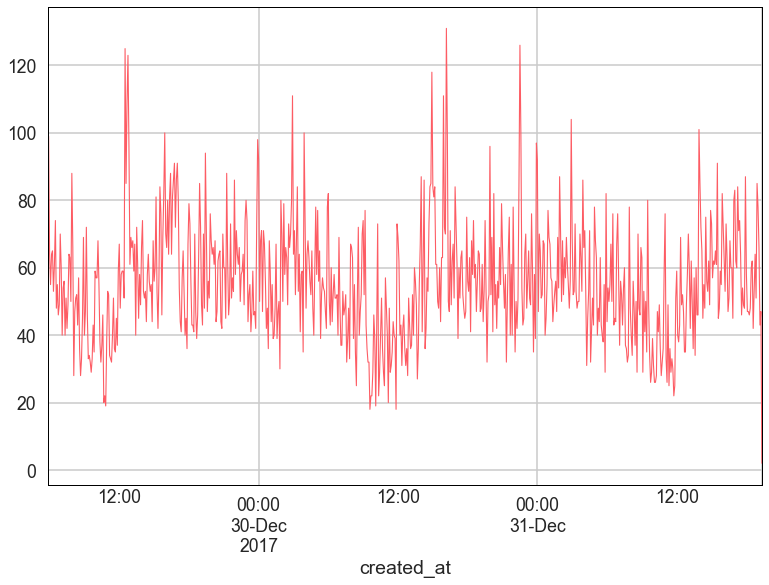

In [41]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
df_4.ones.plot(kind='line', linewidth=1.1, color='#FD5C64')

In [9]:
values_counted = pd.DataFrame(df.location.value_counts())
top_5 = values_counted.head()
top_5.head()

,location
"Pittsburgh, PA",1173
United States,600
"Springfield, MO",528
"Atlanta, GA",410
"Juquitiba, Brasil",335


/Users/borgausifo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans



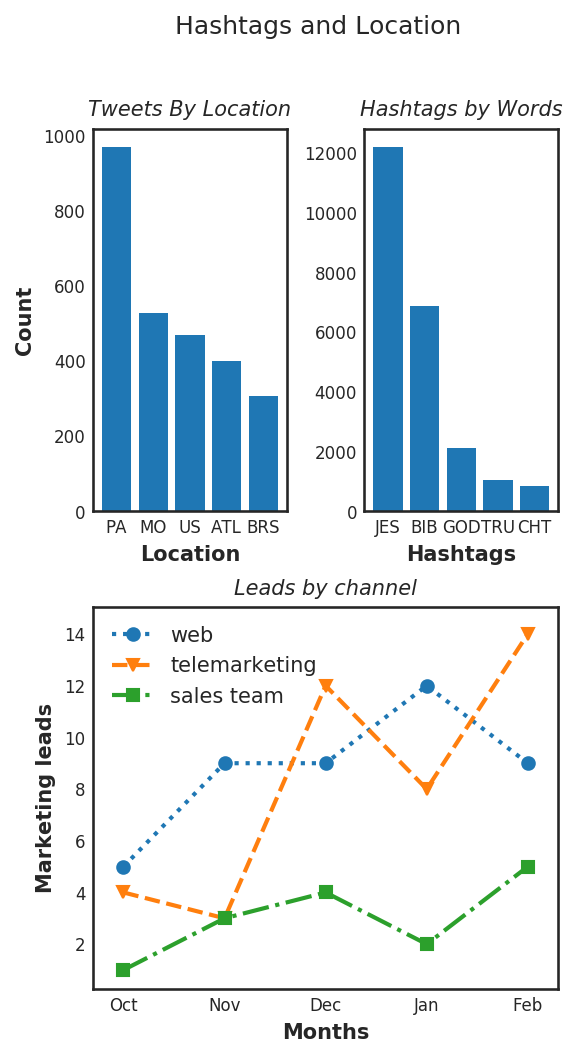

In [53]:
import matplotlib.pyplot as plt

# Set the style globally
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Set an aspect ratio
width, height = plt.figaspect(1.90)
fig = plt.figure(figsize=(width,height), dpi=150)

# Product sales plot
ax1 = plt.subplot(221)
ax1.bar([1, 2, 3, 4, 5], [970, 528, 470, 401, 308], label="Product A", width=0.8,
            align='center')
plt.xticks([1, 2, 3, 4, 5], ['PA', 'MO', 'US', 'ATL', 'BRS'])
plt.xlabel('Location')
plt.ylabel('Count')
# Font style isn't accessible through rcParams
ax1.set_title("Tweets By Location", fontstyle='italic')


# Product sales plot
ax2 = plt.subplot(222)
ax2.bar([1, 2, 3, 4, 5], [12205, 6871, 2124, 1043, 853], label="Product B", width=0.8,
            align='center')
plt.xticks([1, 2, 3, 4, 5], ['JES', 'BIB', 'GOD', 'TRU', 'CHT'])
plt.xlabel('Hashtags')
# Font style isn't accessible through rcParams
ax2.set_title("Hashtags by Words", fontstyle='italic')


# Marketing channels line plot
ax3 = plt.subplot(2,2,(3,4))
y_series = [1,2,3,4,5]
x_1 = [5,9,9,12,9]
x_2 = [4,3,12,8,14]
x_3 = [1,3,4,2,5]
ax3.plot(y_series, x_1, linewidth=2, linestyle=':', marker='o', label='web')
ax3.plot(y_series, x_2, linewidth=2, linestyle='--', marker='v', label='telemarketing')
ax3.plot(y_series, x_3, linewidth=2, linestyle='-.', marker='s', label='sales team')
plt.xlabel('Months')
plt.ylabel('Marketing leads')
plt.xticks([1,2,3,4,5], ['Oct', 'Nov', 'Dec', 'Jan', 'Feb'])
#ax2.tick_params(axis='x', pad=8)
leg=plt.legend(loc='best', numpoints=1, fancybox=True)

# Axes alteration to put zero values inside the figure Axes
# Avoids axis white lines cutting through zero values - fivethirtyeight style
xmin, xmax, ymin, ymax = ax3.axis()
ax3.axis([xmin-0.1, xmax+0.1, ymin-0.1, ymax+0.4])
ax3.set_title('Leads by channel', fontstyle='italic')

# Space plots a bit
plt.subplots_adjust(hspace=0.25, wspace=0.40)

fig.suptitle("Hashtags and Location")
plt.savefig('seaborn-style.svg', bbox_inches='tight')

/Users/borgausifo/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/borgausifo/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


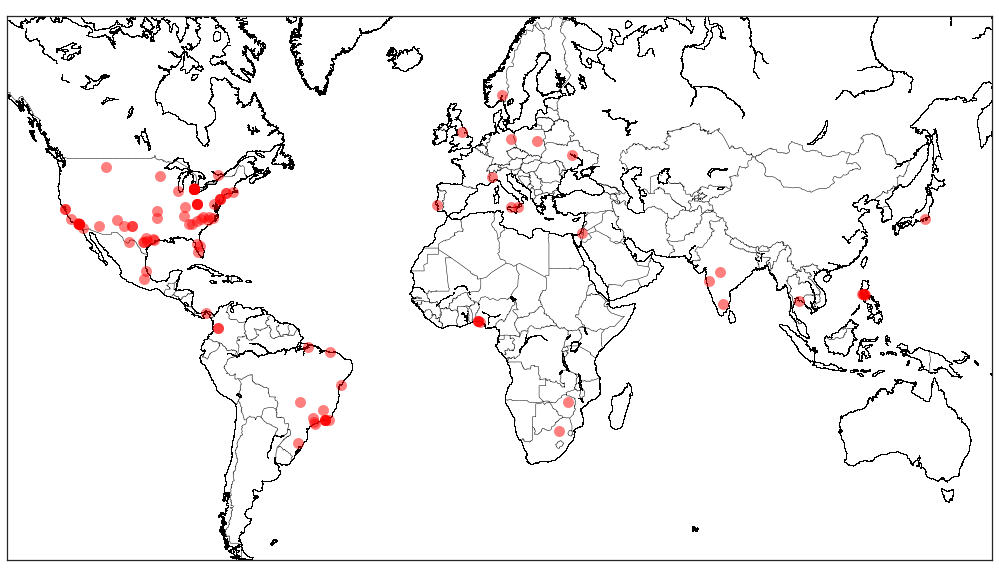

In [10]:
# Plotting the tweets based on locations ! 

from mpl_toolkits.basemap import Basemap
 
# plot the blank world map
plt.figure(figsize=(19,10))
my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
                     resolution = 'h', area_thresh = 5000.0,
                     llcrnrlon=-140, llcrnrlat=-55,
                     urcrnrlon=160, urcrnrlat=70)
# set resolution='h' for high quality
 
# draw elements onto the world map
my_map.drawcountries()
#my_map.drawstates()
my_map.drawcoastlines(antialiased=False,
                      linewidth=0.005)
 
# add coordinates as red dots
longs = list(df.loc[(df.long != 'NaN')].long)
latts = list(df.loc[df.latt != 'NaN'].latt)
x, y = my_map(longs, latts)
my_map.plot(x, y, 'ro', markersize=11, alpha=0.5)
 
plt.show()